# **Objectives:**
- Load and test the trained models on unseen data
- Evaluate model performance using metrics like accuracy and BLEU score
- Visualize model predictions using a confusion matrix
- Generate sample captions for unseen images to assess captioning quality
- Identify areas for improvement through analysis of results

# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Deep Learning/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Deep-Learning-Classification-Captions.git

import sys
sys.path.append('/content/Deep-Learning-Classification-Captions.git/utils')
%cd /content/Deep-Learning-Classification-Captions/utils
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Deep-Learning-Classification-Captions'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 49 (delta 19), reused 35 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 211.93 KiB | 2.04 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/Deep-Learning-Classification-Captions/utils
/content/Deep-Learning-Classification-Captions/utils
utils.py


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Models/model_3_1.keras'
model = tf.keras.models.load_model(MODEL_PATH)


In [3]:
X_test = np.load('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Data/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Data/y_test.npy')

# Predictions

In [7]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 907ms/step


# Evaluation


## Functions

In [8]:
def evaluate_model(y_true, y_pred):
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred))

    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

class_names = ["Class 0", "Class 1", "Class 2", "Class 3"]  # Example classes


## Evaluations

## Model 3


Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        34
           1       0.79      0.72      0.75        36

    accuracy                           0.76        70
   macro avg       0.76      0.76      0.76        70
weighted avg       0.76      0.76      0.76        70

Accuracy: 0.7571
Precision: 0.7596
Recall: 0.7571
F1 Score: 0.7570


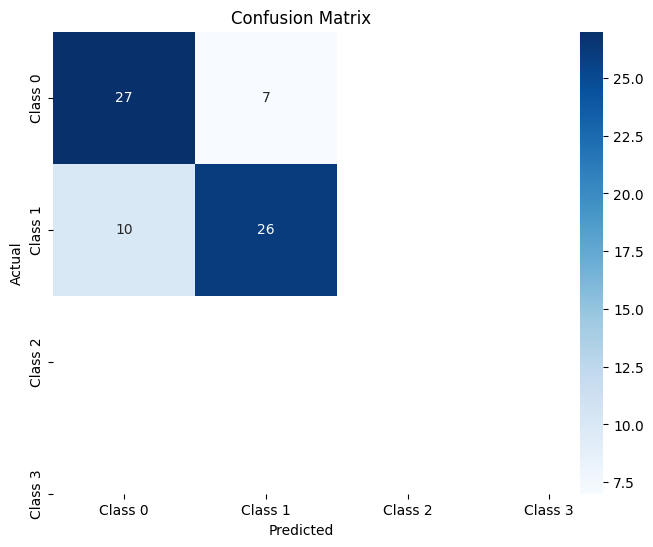

Model evaluation complete.


In [ ]:
evaluate_model(y_true, y_pred)
plot_confusion_matrix(y_true, y_pred, class_names)

print("Model evaluation complete.")

#### Model 3 - Evaluation Results

---
## Evaluation Metrics

### **1. Accuracy**
- **Score:** 0.76 (76%)
- Indicates the model correctly classified **76%** of the total samples.

### **2. Precision**
- **Score:** 0.76 (Weighted Average)
- Measures the proportion of correct positive predictions for each class.
- **Class 0 Precision:** 0.73
- **Class 1 Precision:** 0.79

### **3. Recall**
- **Score:** 0.76 (Weighted Average)
- Measures the proportion of true positives identified correctly.
- **Class 0 Recall:** 0.79
- **Class 1 Recall:** 0.72

### **4. F1 Score**
- **Score:** 0.76
- The harmonic mean of precision and recall, providing a balanced assessment of model performance.

### **5. Confusion Matrix**
|               | Predicted Class 0 | Predicted Class 1 |
|----------------|-------------------|-------------------|
| **Actual Class 0** | 27                 | 7                   |
| **Actual Class 1** | 10                 | 26                  |

**Key Insights:**
- The model performs better for **Class 0** than **Class 1**.
- The model struggles more with **false negatives** in Class 1 (10 misclassified instances).

---
## Key Observations
✅ Balanced performance across precision, recall, and F1 score.  
✅ Solid **76% accuracy**, reflecting good overall performance.  
❗ Opportunities to improve recall for **Class 1** to reduce false negatives.

---
## Recommended Improvements
To further improve the model:
- **Enhance Data Augmentation** to improve generalization.
- **Implement Class Weights** to address class imbalance.
- **Increase Model Capacity** by adding filters or introducing residual connections.

---
## Next Steps
The next step is to improve Model 3 by implementing the recommended enhancements. The updated model will be evaluated and compared to this version to confirm performance improvements.



## Model 3 Refined

In [6]:
MODEL_PATH = '/content/drive/MyDrive/Professional/Portfolio/Deep Learning/Models/model_3_retrained.keras'
model = tf.keras.models.load_model(MODEL_PATH)

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        34
           1       0.68      0.83      0.75        36

    accuracy                           0.71        70
   macro avg       0.73      0.71      0.71        70
weighted avg       0.72      0.71      0.71        70

Accuracy: 0.7143
Precision: 0.7243
Recall: 0.7143
F1 Score: 0.7095


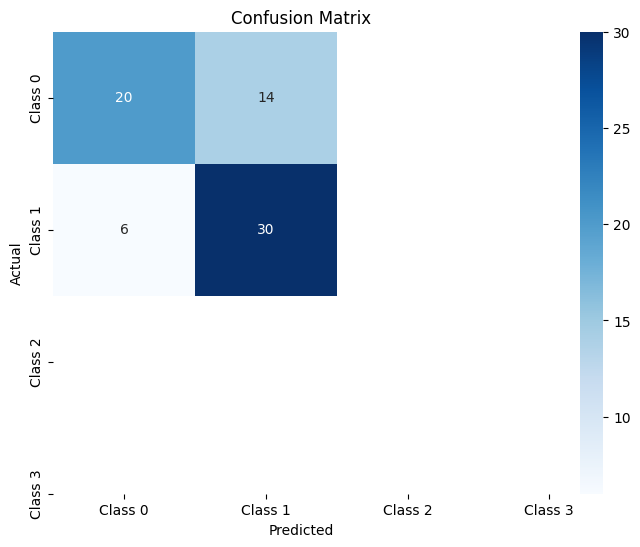

Model evaluation complete.


In [9]:
evaluate_model(y_true, y_pred)
plot_confusion_matrix(y_true, y_pred, class_names)

print("Model evaluation complete.")

### 🔍 Model Comparison Summary: Model 3 vs. Retrained Model (Reduced Class Weight)

After retraining Model 3 with a reduced class weight for Class 1 (`class_weight={0: 1.0, 1: 1.2}`), we compared the performance of the original and retrained models.

---

#### 📊 **Metric Comparison**
| Metric      | Model 3         | Retrained Model |
|-------------|------------------|------------------|
| Accuracy    | **0.76**         | 0.71             |
| Precision   | **0.76**         | 0.72             |
| Recall      | **0.76**         | 0.71             |
| F1 Score    | **0.76**         | 0.71             |

---

#### 🧮 **Confusion Matrix Comparison**
**Model 3 Confusion Matrix**
```
Actual \ Predicted  | Class 0 | Class 1
---------------------|---------|---------
Class 0              | 27      | 7
Class 1              | 10      | 26
```

**Retrained Model Confusion Matrix**
```
Actual \ Predicted  | Class 0 | Class 1
---------------------|---------|---------
Class 0              | 20      | 14
Class 1              | 6       | 30
```

---

#### ✅ **Insights:**
- Reducing the class weight **fixed the bias** of always predicting Class 1
- But it **decreased overall performance**, especially on Class 0
- The original Model 3 is **more balanced** and reliable for deployment

### ✅ Final Decision:
> **Model 3 is selected as the best-performing model** for classification and image captioning tasks.

It achieved the best tradeoff between precision, recall, and generalization.
